<a href="https://colab.research.google.com/github/reeda23/Deep-Learning-With-Pytorch/blob/main/12_Feedforward_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feed-Forward Neural Network

MNIST<br>
DataLoader, Transformation <br>
Multilayer Neural Net, activation function <br>
Loss and Optimizer <br>
Training Loop (batch training) <br>
Model evaluation <br>
GPU support <br>

# Import Libraries

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#device configuration 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
device

device(type='cpu')

**Hyper Parameters**

In [4]:
#hyper parameters

input_size = 784 #flatten 28x28  to be 1D tensor
hidden_size = 100
num_classes = 10  #digits are from 0 to 9
num_epochs = 2 
batch_size = 100
learning_rate = 0.001



**Dataset**

In [5]:
from numpy import False_
# MNIST

train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download= True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=False,
                                           transform=transforms.ToTensor())

**DataLoader**

In [6]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)


**Examples**

In [7]:
examples = iter(train_loader) 

In [8]:
samples, labels = examples.next()

In [9]:
print(samples.shape, labels.shape)

#samples

#100 because batch size is 100
#1 because we have 1 channel we don't have any color channels
#28, 28 actual image

#label
#for each class label we have one value


torch.Size([100, 1, 28, 28]) torch.Size([100])


**Plot**

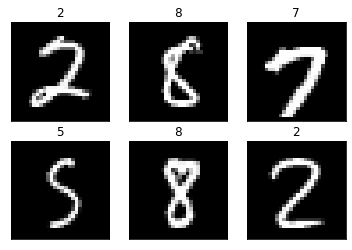

In [10]:
for i in range(6):
    ax = plt.subplot(2,3, i+1, xticks=[], yticks=[])
    plt.imshow(samples[i][0], cmap='gray') #0 because we want to access first channel
    ax.set_title(str(labels[i].item()))
plt.show()    

**Neural Network** <br>

**Model**

In [11]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        #we don't apply softmax here because binary cross entropy loss will does that for us.
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)


**Loss and Optimizer**

In [12]:
#loss and optimizer 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [13]:
#training loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    #loop over all batches
    for i, (images, labels) in enumerate(train_loader): #enumerate will give actual index and data(in tuple form)
        #100, 1, 28, 28 
        #100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)


        #forward
        predicted_labels = model(images)
        loss = criterion(predicted_labels, labels)


        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch: {epoch+1}, step: {i+1}/{n_total_steps}, loss: {loss.item():.4f}')

epoch: 1, step: 100/600, loss: 0.5012
epoch: 1, step: 200/600, loss: 0.3149
epoch: 1, step: 300/600, loss: 0.3646
epoch: 1, step: 400/600, loss: 0.2233
epoch: 1, step: 500/600, loss: 0.4182
epoch: 1, step: 600/600, loss: 0.4205
epoch: 2, step: 100/600, loss: 0.3285
epoch: 2, step: 200/600, loss: 0.1109
epoch: 2, step: 300/600, loss: 0.1438
epoch: 2, step: 400/600, loss: 0.0907
epoch: 2, step: 500/600, loss: 0.2098
epoch: 2, step: 600/600, loss: 0.0729


# Testing

In [14]:
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0

    #loop over all the batches in test images
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        #max func will return value and index we are interested in index which is class label
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0] #it will give no of samples in the current batch
        n_correct += (predictions == labels).sum().item()


    #accuracy 
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy = {acc}')

Accuracy = 95.3


# Visualize Sample Test Results

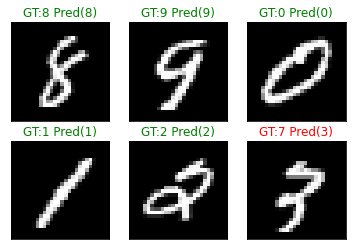

In [26]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

with torch.no_grad():
    #loop over all the batches in test images
    for images, labels in test_loader:
        imgs = images
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        # convert output probabilities to predicted class
        _, preds = torch.max(outputs, 1)
        # prep images for display
        images = images.numpy() 


# plot the images in the batch, along with predicted and true labels
for i in range(6):
    ax = plt.subplot(2,3, i+1, xticks=[], yticks=[])
    plt.imshow(imgs[i][0], cmap='gray')
    ax.set_title("GT:{} Pred({})".format(str(preds[i].item()), str(labels[i].item())),
                 color=("green" if preds[i]==labels[i] else "red"))
plt.show()